In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

In [43]:
def cluster(matrix, n, k):
    clust = np.zeros(n)
    for i in range(n):
        max_affiliation = max(matrix[i])
        for j in range(k):
            if matrix[i][j] == max_affiliation:
                clust[i] = j
    return clust

In [44]:
def recalc_centers(x, y, matrix, k, m):
    x_c, y_c = [], []
    for i in range(k):
        s = sum(matrix[j, i]**m for j in range(len(x)) if matrix[j, i] == max(p for p in matrix[j]))
        c_x = sum(matrix[j, i]**m * x[j] for j in range(len(x)) if matrix[j, i] == max(p for p in matrix[j]))
        c_y = sum(matrix[j, i]**m * y[j] for j in range(len(x)) if matrix[j, i] == max(p for p in matrix[j]))
        x_c.append(c_x / s) if s != 0 else 0
        y_c.append(c_y / s) if s != 0 else 0
    return x_c, y_c

In [45]:
def change_matrix(n, k, x, y, x_c, y_c, m):
    matrix = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            sum = 0
            disttocent1 = dist(x[i], y[i], x_c[j], y_c[j])
            for t in range(k):
                disttocent2 = dist(x[i], y[i], x_c[t], y_c[t])
                sum += (disttocent1 / disttocent2) ** (2 / (m - 1))
            matrix[i, j] = 1 / sum
    return matrix

In [46]:
def stop_cmeans(old_matrix, matrix, n, k, epsilon):
    max = 0
    for i in range(n):
        for j in range(k):
            diff = np.abs(matrix[i, j] - old_matrix[i, j])
            if diff > max:
                max = diff
    return max < epsilon

In [47]:
def c_means(n, k, m, eps):
    x = np.random.randint(1, 100, n)
    y = np.random.randint(1, 100, n)
    matrix = np.zeros((n, k))
    
    for i in range(n):
        for j in range(k):
            matrix[i, j] = np.random.uniform(1, 4)

    while True:
        x_c, y_c = recalc_centers(x, y, matrix, k, m)
        new_matrix = change_matrix(n, k, x, y, x_c, y_c, m)
        if stop_cmeans(new_matrix, matrix, n, k, eps):
            clusters = cluster(new_matrix, n, k)
            for i in range(len(x)):
                plt.scatter(x[i], y[i], c=colors[int(clusters[i])])
            for i in range(len(x_c)):
                plt.scatter(x_c[i], y_c[i], marker='*',c=colors[i], s=150)
            plt.show()
            break
        matrix = new_matrix

H:\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
H:\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


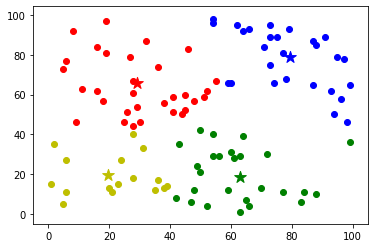

In [48]:
colors = ['r','g','blue','y','black','darkmagenta','c','m','k','khaki','teal']
c_means(100, 4, 1.5, 0.1)